# Classification model using In-Built Library

## Import libraries

In [1]:
import numpy as np
import pandas as pd

## Loading data

In [2]:
# Reading data
data = pd.read_csv("https://raw.githubusercontent.com/sreekeshiyer/dmbi_aids_datasets/main/loan_data.csv").dropna()
data.head(5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


## Train - Test Split

In [3]:
X = data.drop('purpose', axis=1).iloc[:, :-1].values
y = data.drop('purpose', axis=1).iloc[:, -1].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=42)

## Training on Inbuilt DecisionTreeClassfier

In [4]:
from sklearn.tree import DecisionTreeClassifier
clf_model = DecisionTreeClassifier(criterion="gini",max_depth=3)   
clf_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'X[0] <= 0.5\ngini = 0.268\nsamples = 6704\nvalue = [5637, 1067]'),
 Text(0.25, 0.625, 'X[9] <= 5.5\ngini = 0.401\nsamples = 1310\nvalue = [947, 363]'),
 Text(0.125, 0.375, 'X[1] <= 0.16\ngini = 0.374\nsamples = 996\nvalue = [748, 248]'),
 Text(0.0625, 0.125, 'gini = 0.352\nsamples = 842\nvalue = [650, 192]'),
 Text(0.1875, 0.125, 'gini = 0.463\nsamples = 154\nvalue = [98, 56]'),
 Text(0.375, 0.375, 'X[6] <= 6495.979\ngini = 0.464\nsamples = 314\nvalue = [199, 115]'),
 Text(0.3125, 0.125, 'gini = 0.449\nsamples = 268\nvalue = [177, 91]'),
 Text(0.4375, 0.125, 'gini = 0.499\nsamples = 46\nvalue = [22, 24]'),
 Text(0.75, 0.625, 'X[1] <= 0.093\ngini = 0.227\nsamples = 5394\nvalue = [4690, 704]'),
 Text(0.625, 0.375, 'X[7] <= 114235.5\ngini = 0.102\nsamples = 1128\nvalue = [1067, 61]'),
 Text(0.5625, 0.125, 'gini = 0.099\nsamples = 1125\nvalue = [1066, 59]'),
 Text(0.6875, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.875, 0.375, 'X[9] <= 2.5\ngini = 0.256\

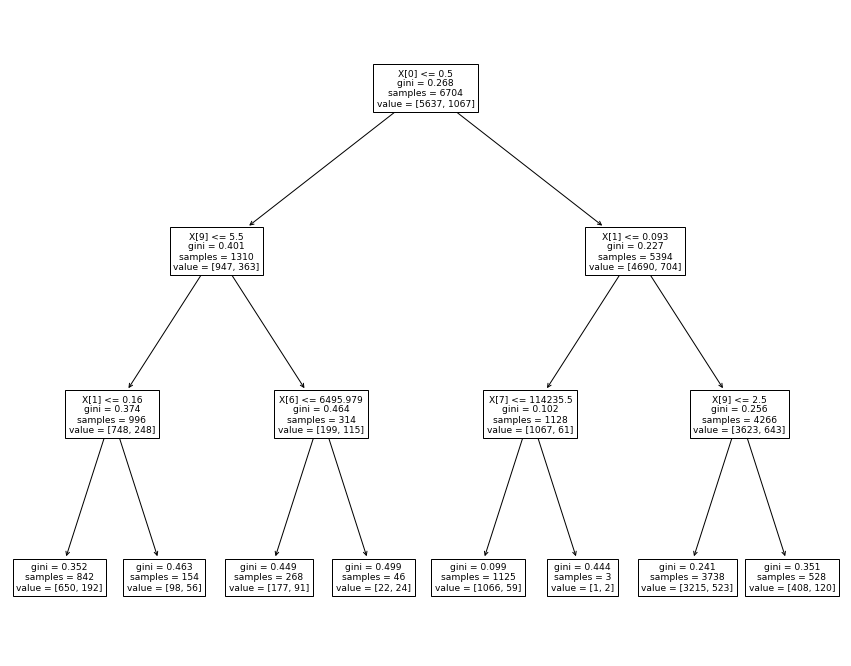

In [5]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15,12))
tree.plot_tree(clf_model)

## Prediction Analysis

In [6]:
y_predict = clf_model.predict(X_test)

In [7]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [8]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2408
           1       0.32      0.02      0.03       466

    accuracy                           0.83      2874
   macro avg       0.58      0.51      0.47      2874
weighted avg       0.76      0.83      0.77      2874



In [9]:
cm = confusion_matrix(y_test, y_predict)
print(cm)

[[2391   17]
 [ 458    8]]


In [10]:
accuracy_score(y_test,y_predict)

0.8347251217814892

## Training on Inbuilt Gaussian Naive Bayes Classifier

In [11]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

## Prediction Analysis

In [12]:
y_pred = gnb.predict(X_test)

In [13]:
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.8183716075156576


# Classification model using User-Defined Classifier

## Import tools

In [14]:
import numpy as np
import pandas as pd
# Quick value count calculator
from collections import Counter

## Code for Decision tree building

In [15]:
class Node: 
    """
    Class for creating the nodes for a decision tree 
    """
    def __init__(
        self, 
        Y: list,
        X: pd.DataFrame,
        min_samples_split=None,
        max_depth=None,
        depth=None,
        node_type=None,
        rule=None
    ):
        # Saving the data to the node 
        self.Y = Y 
        self.X = X

        # Saving the hyper parameters
        self.min_samples_split = min_samples_split if min_samples_split else 20
        self.max_depth = max_depth if max_depth else 5

        # Default current depth of node 
        self.depth = depth if depth else 0

        # Extracting all the features
        self.features = list(self.X.columns)

        # Type of node 
        self.node_type = node_type if node_type else 'root'

        # Rule for spliting 
        self.rule = rule if rule else ""

        # Calculating the counts of Y in the node 
        self.counts = Counter(Y)

        # Getting the GINI impurity based on the Y distribution
        self.gini_impurity = self.get_GINI()

        # Sorting the counts and saving the final prediction of the node 
        counts_sorted = list(sorted(self.counts.items(), key=lambda item: item[1]))

        # Getting the last item
        yhat = None
        if len(counts_sorted) > 0:
            yhat = counts_sorted[-1][0]

        # Saving to object attribute. This node will predict the class with the most frequent class
        self.yhat = yhat 

        # Saving the number of observations in the node 
        self.n = len(Y)

        # Initiating the left and right nodes as empty nodes
        self.left = None 
        self.right = None 

        # Default values for splits
        self.best_feature = None 
        self.best_value = None 

    @staticmethod
    def GINI_impurity(y1_count: int, y2_count: int) -> float:
        """
        Given the observations of a binary class calculate the GINI impurity
        """
        # Ensuring the correct types
        if y1_count is None:
            y1_count = 0

        if y2_count is None:
            y2_count = 0

        # Getting the total observations
        n = y1_count + y2_count
        
        # If n is 0 then we return the lowest possible gini impurity
        if n == 0:
            return 0.0

        # Getting the probability to see each of the classes
        p1 = y1_count / n
        p2 = y2_count / n
        
        # Calculating GINI 
        gini = 1 - (p1 ** 2 + p2 ** 2)
        
        # Returning the gini impurity
        return gini

    @staticmethod
    def ma(x: np.array, window: int) -> np.array:
        """
        Calculates the moving average of the given list. 
        """
        return np.convolve(x, np.ones(window), 'valid') / window

    def get_GINI(self):
        """
        Function to calculate the GINI impurity of a node 
        """
        # Getting the 0 and 1 counts
        y1_count, y2_count = self.counts.get(0, 0), self.counts.get(1, 0)

        # Getting the GINI impurity
        return self.GINI_impurity(y1_count, y2_count)

    def best_split(self) -> tuple:
        """
        Given the X features and Y targets calculates the best split 
        for a decision tree
        """
        # Creating a dataset for spliting
        df = self.X.copy()
        df['Y'] = self.Y

        # Getting the GINI impurity for the base input 
        GINI_base = self.get_GINI()

        # Finding which split yields the best GINI gain 
        max_gain = 0

        # Default best feature and split
        best_feature = None
        best_value = None

        for feature in self.features:
            # Droping missing values
            Xdf = df.dropna().sort_values(feature)

            # Sorting the values and getting the rolling average
            xmeans = self.ma(Xdf[feature].unique(), 2)

            for value in xmeans:
                # Spliting the dataset 
                left_counts = Counter(Xdf[Xdf[feature]<value]['Y'])
                right_counts = Counter(Xdf[Xdf[feature]>=value]['Y'])

                # Getting the Y distribution from the dicts
                y0_left, y1_left, y0_right, y1_right = left_counts.get(0, 0), left_counts.get(1, 0), right_counts.get(0, 0), right_counts.get(1, 0)

                # Getting the left and right gini impurities
                gini_left = self.GINI_impurity(y0_left, y1_left)
                gini_right = self.GINI_impurity(y0_right, y1_right)

                # Getting the obs count from the left and the right data splits
                n_left = y0_left + y1_left
                n_right = y0_right + y1_right

                # Calculating the weights for each of the nodes
                w_left = n_left / (n_left + n_right)
                w_right = n_right / (n_left + n_right)

                # Calculating the weighted GINI impurity
                wGINI = w_left * gini_left + w_right * gini_right

                # Calculating the GINI gain 
                GINIgain = GINI_base - wGINI

                # Checking if this is the best split so far 
                if GINIgain > max_gain:
                    best_feature = feature
                    best_value = value 

                    # Setting the best gain to the current one 
                    max_gain = GINIgain

        return (best_feature, best_value)

    def grow_tree(self):
        """
        Recursive method to create the decision tree
        """
        # Making a df from the data 
        df = self.X.copy()
        df['Y'] = self.Y

        # If there is GINI to be gained, we split further 
        if (self.depth < self.max_depth) and (self.n >= self.min_samples_split):

            # Getting the best split 
            best_feature, best_value = self.best_split()

            if best_feature is not None:
                # Saving the best split to the current node 
                self.best_feature = best_feature
                self.best_value = best_value

                # Getting the left and right nodes
                left_df, right_df = df[df[best_feature]<=best_value].copy(), df[df[best_feature]>best_value].copy()

                # Creating the left and right nodes
                left = Node(
                    left_df['Y'].values.tolist(), 
                    left_df[self.features], 
                    depth=self.depth + 1, 
                    max_depth=self.max_depth, 
                    min_samples_split=self.min_samples_split, 
                    node_type='left_node',
                    rule=f"{best_feature} <= {round(best_value, 3)}"
                    )

                self.left = left 
                self.left.grow_tree()

                right = Node(
                    right_df['Y'].values.tolist(), 
                    right_df[self.features], 
                    depth=self.depth + 1, 
                    max_depth=self.max_depth, 
                    min_samples_split=self.min_samples_split,
                    node_type='right_node',
                    rule=f"{best_feature} > {round(best_value, 3)}"
                    )

                self.right = right
                self.right.grow_tree()

    def print_info(self, width=4):
        """
        Method to print the infromation about the tree
        """
        # Defining the number of spaces 
        const = int(self.depth * width ** 1.5)
        spaces = "-" * const
        
        if self.node_type == 'root':
            print("Root")
        else:
            print(f"|{spaces} Split rule: {self.rule}")
        print(f"{' ' * const}   | GINI impurity of the node: {round(self.gini_impurity, 2)}")
        print(f"{' ' * const}   | Class distribution in the node: {dict(self.counts)}")
        print(f"{' ' * const}   | Predicted class: {self.yhat}")   

    def print_tree(self):
        """
        Prints the whole tree from the current node to the bottom
        """
        self.print_info() 
        
        if self.left is not None: 
            self.left.print_tree()
        
        if self.right is not None:
            self.right.print_tree()

    def predict(self, X:pd.DataFrame):
        """
        Batch prediction method
        """
        predictions = []

        for _, x in X.iterrows():
            values = {}
            for feature in self.features:
                values.update({feature: x[feature]})
        
            predictions.append(self.predict_obs(values))
        
        return predictions

    def predict_obs(self, values: dict) -> int:
        """
        Method to predict the class given a set of features
        """
        cur_node = self
        while cur_node.depth < cur_node.max_depth:
            # Traversing the nodes all the way to the bottom
            best_feature = cur_node.best_feature
            best_value = cur_node.best_value

            if cur_node.n < cur_node.min_samples_split:
                break 

            if (values.get(best_feature) < best_value):
                if self.left is not None:
                    cur_node = cur_node.left
            else:
                if self.right is not None:
                    cur_node = cur_node.right
            
        return cur_node.yhat


## Loading Data

In [17]:
# Reading data
data = pd.read_csv("https://raw.githubusercontent.com/sreekeshiyer/dmbi_aids_datasets/main/loan_data.csv").dropna()
data.head(5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


## Train-Test split

In [18]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2)

## Training

In [19]:
# Constructing the X and Y matrices
X = train[['int.rate', 'installment', 'log.annual.inc','dti','fico','days.with.cr.line','revol.bal','revol.util','inq.last.6mths','delinq.2yrs','pub.rec']]
Y = train['not.fully.paid'].values.tolist()

In [20]:
# Initiating the Node
root = Node(Y, X, max_depth=3, min_samples_split=100)

# Getting the best split
root.grow_tree()

# Printing the tree information 
root.print_tree()

Root
   | GINI impurity of the node: 0.27
   | Class distribution in the node: {0: 6449, 1: 1213}
   | Predicted class: 0
|-------- Split rule: inq.last.6mths <= 3.5
           | GINI impurity of the node: 0.24
           | Class distribution in the node: {0: 5748, 1: 928}
           | Predicted class: 0
|---------------- Split rule: int.rate <= 0.093
                   | GINI impurity of the node: 0.09
                   | Class distribution in the node: {0: 1222, 1: 62}
                   | Predicted class: 0
|------------------------ Split rule: log.annual.inc <= 9.258
                           | GINI impurity of the node: 0.46
                           | Class distribution in the node: {0: 7, 1: 4}
                           | Predicted class: 0
|------------------------ Split rule: log.annual.inc > 9.258
                           | GINI impurity of the node: 0.09
                           | Class distribution in the node: {0: 1215, 1: 58}
                           | Predicted

## Prediction Analysis

In [21]:
# Predicting 
pred = root.predict(test)

In [22]:
actual = list(test['not.fully.paid'])

In [23]:
accuracy = sum(1 for x,y in zip(actual,pred) if x == y) / len(actual)
print("Accuracy:",accuracy)

Accuracy: 0.8324634655532359
